In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score, make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sympy import *
from tqdm import tqdm
import time

# PROBLEM 1

In [ ]:
def problem1_task1():
    """
        Predictive models on the estimation of energy performance of residential buildings.

            Parameters:

            Features: X

                X1: relative compactness
                X2: surface area
                X3: wall area
                X4: roof area
                X5: overall height
                X6: orientation
                X7: glazing area
                X8: glazing area distribution

            Targets: y

                Y1: heating load (HL)
                Y2: cooling load (CL)
    """
    # Get data from sheet
    df = pd.read_excel('data/ENB2012_data.xlsx')

    features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
    targets = ['Y1', 'Y2']

    X = df[features]
    y = df[targets]
    
    # Scaling and normalizing the data
    X_normalized = preprocessing.normalize(X, norm='l2')
    alpha_values = [0.001,0.01,0.1, 1.0, 10.0]
    regr_cv = RidgeCV(alphas=alpha_values)
    model_cv = regr_cv.fit(X_normalized, y)
    optimum_alpha = model_cv.alpha_
    print(f"Optimum alpha : {optimum_alpha}")
    
    
    ridge_model = Ridge(normalize = True)

    scoring_metrics = ['neg_mean_squared_error', 'neg_mean_absolute_error']

    print("---------------------------------------------------")
    print(f"Alpha : {optimum_alpha}")
    ridge_model.alpha = optimum_alpha
    # prepare the cross-validation procedure
    ridge_cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
    # evaluate model
    scores = cross_validate(ridge_model, X, y, scoring=scoring_metrics, cv=ridge_cv, n_jobs=-1)
    ridge_MSE_means = (np.mean(scores['test_neg_mean_squared_error']))
    ridge_MAE_means = (np.mean(scores['test_neg_mean_absolute_error']))
    ridge_MSE_stds = (np.std(scores['test_neg_mean_squared_error']))
    ridge_MAE_stds = (np.std(scores['test_neg_mean_absolute_error']))
    # report performance
    print('MSE (mean) : %.3f (std) : (%.3f)' % (ridge_MSE_means, ridge_MSE_stds))
    print('MAE (mean) : %.3f (std) : (%.3f)' % (ridge_MAE_means, ridge_MAE_stds))
    print("****************************************************")


In [2]:
def problem1_task2():
    """
        Predictive models on the estimation of energy performance of residential buildings.

            Parameters:

            Features: X

                X1: relative compactness
                X2: surface area
                X3: wall area
                X4: roof area
                X5: overall height
                X6: orientation
                X7: glazing area
                X8: glazing area distribution

            Targets: y

                Y1: heating load (HL)
                Y2: cooling load (CL)
    """
    # Get data from sheet
    df = pd.read_excel('data/ENB2012_data.xlsx')

    features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
    targets = ['Y1', 'Y2']

    X = df[features]
    y = df[targets]
    
    # Scaling and normalizing the data
    X_normalized = preprocessing.normalize(X, norm='l2')
    
    scoring_metrics = ['neg_mean_squared_error', 'neg_mean_absolute_error']
    
        # Create the parameter grid based on the results of random search 
    param_grid = {
        'max_depth': [50, 150, 250],
        'min_samples_leaf': [1, 2, 3],
        'min_samples_split': [2, 3],
        'n_estimators': [10, 50, 100, 250, 500]
    }
    # Create a based model
    rf_model = RandomForestRegressor()
    # evaluate the model
    rfr_cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, scoring=scoring_metrics,
                              cv = rfr_cv, n_jobs = -1, verbose = 2, refit=False)
    # Fit the grid search to the data
    grid_search.fit(X_normalized, y)
    best_grid = grid_search.best_estimator_
    print(best_grid)

In [ ]:
problem1_task1()

In [3]:
problem1_task2()

Fitting 100 folds for each of 90 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
/Users/testinium/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 684 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 1160 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1853 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2506 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3425 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 4424 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 5529 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 6874 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 81

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [35]:
# Get data from sheet
df = pd.read_excel('data/ENB2012_data.xlsx')

features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
targets = ['Y1', 'Y2']

X = df[features]
y = df[targets]
    
# Scaling and normalizing the data
min_max_scaler = preprocessing.MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)

scoring_metrics = ['neg_mean_squared_error', 'neg_mean_absolute_error']

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [50, 150, 250],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3],
    'n_estimators': [10, 50, 100, 250, 500]
}
# Create a based model
rf_model = RandomForestRegressor()
# evaluate the model
rfr_cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, scoring=scoring_metrics,
                          cv = rfr_cv, n_jobs = -1, verbose = 2, refit=callable)
# Fit the grid search to the data for y1
print("Grid result for X normalized and Y1")
grid_results_y1 = grid_search.fit(X_normalized, y['Y1'])
print(grid_results_y1.best_params_)

Grid result for X normalized and Y1
Fitting 100 folds for each of 90 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
/Users/testinium/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 925 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 1577 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2493 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3514 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4724 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 5992 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 7545 tasks      | elapsed:  5.9min


{'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed:  7.0min finished


In [37]:
rf_model_y1 = RandomForestRegressor(**grid_results_y1.best_params_)
for score in scoring_metrics:
        print(score),
        print (" : "),
        score_result = cross_val_score(rf_model_y1, X_normalized, y['Y1'], scoring=score, cv=rfr_cv, n_jobs=-1)
        rf_score_means = (-1 * np.mean(score_result))
        rf_score_stds = (np.std(score_result))
        # report performance
        print('(mean) : %.3f (std) : (%.3f)' % (rf_score_means, rf_score_stds))
        print("****************************************************")

neg_mean_squared_error
 : 
(mean) : 0.245 (std) : (0.090)
****************************************************
neg_mean_absolute_error
 : 
(mean) : 0.329 (std) : (0.040)
****************************************************


In [39]:
grid_results_y2 = grid_search.fit(X_normalized, y['Y2'])
print(grid_results_y2.best_params_)
rf_model_y2 = RandomForestRegressor(**grid_results_y2.best_params_)
for score in scoring_metrics:
        print(score),
        print (" : "),
        score_result = cross_val_score(rf_model_y2, X_normalized, y['Y2'], scoring=score, cv=rfr_cv, n_jobs=-1)
        rf_score_means = (-1 * np.mean(score_result))
        rf_score_stds = (np.std(score_result))
        # report performance
        print('(mean) : %.3f (std) : (%.3f)' % (rf_score_means, rf_score_stds))
        print("****************************************************")

Fitting 100 folds for each of 90 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.9s
/Users/testinium/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 925 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 1496 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2437 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3402 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4505 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 5912 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 7385 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 8954 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 90

{'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
neg_mean_squared_error
 : 
(mean) : 2.930 (std) : (0.894)
****************************************************
neg_mean_absolute_error
 : 
(mean) : 1.017 (std) : (0.158)
****************************************************


In [28]:
scores_y1

{'fit_time': array([0.05013728, 0.048558  , 0.04555106, 0.04502916, 0.04495811,
        0.04700971, 0.03856325, 0.03595996, 0.04227686, 0.03843403,
        0.02865791, 0.037009  , 0.0273118 , 0.03255105, 0.02692914,
        0.02030206, 0.02359605, 0.01995015, 0.04779506, 0.02727294,
        0.02008319, 0.04472899, 0.02416897, 0.04951382, 0.04948211,
        0.02031612, 0.03141022, 0.028193  , 0.01983905, 0.01968598,
        0.02675462, 0.02009988, 0.03210115, 0.03772593, 0.02807188,
        0.02462387, 0.03203273, 0.02054405, 0.02702618, 0.0226419 ,
        0.03418016, 0.02234197, 0.0266068 , 0.02740479, 0.03299999,
        0.02712822, 0.03705502, 0.02641106, 0.02905416, 0.02567196,
        0.02620792, 0.02989101, 0.03166389, 0.03300786, 0.02634001,
        0.03580809, 0.03298903, 0.02642417, 0.02883625, 0.02843714,
        0.03652096, 0.02712226, 0.03298807, 0.02611518, 0.0277009 ,
        0.02990317, 0.02641511, 0.03254294, 0.03265977, 0.02562094,
        0.03127313, 0.02658415, 0.03

In [8]:
grid_search.fit(X_normalized, y)
grid_search.b

Fitting 100 folds for each of 90 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1652 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3329 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4304 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 5385 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 6522 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 7925 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed: 11.7min finished


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [18]:
results_df = pd.DataFrame(grid_search.cv_results_)
results_df[['mean_test_neg_mean_absolute_error','mean_test_neg_mean_squared_error']]

,mean_test_neg_mean_absolute_error,mean_test_neg_mean_squared_error
0,-0.790681,-2.304826
1,-0.777258,-2.198255
2,-0.771690,-2.159435
3,-0.770573,-2.154504
4,-0.769297,-2.148807
...,...,...
85,-0.842941,-2.254338
86,-0.831923,-2.196605
87,-0.830324,-2.184033
88,-0.828448,-2.171968


In [4]:
# Get data from sheet
df = pd.read_excel('data/ENB2012_data.xlsx')

In [5]:
# to evaluate whether any value is missing
df.isnull().values.any()

False

In [6]:
# Observe the features and targets. Later they are going to be split.
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [7]:
"""
Predictive models on the estimation of energy performance of
residential buildings.

Parameters:

    Features: X

        X1: relative compactness
        X2: surface area
        X3: wall area
        X4: roof area
        X5: overall height
        X6: orientation
        X7: glazing area
        X8: glazing area distribution
        
    Targets: y
    
        Y1: heating load (HL)
        Y2: cooling load (CL)
"""

features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
targets = ['Y1', 'Y2']

X = df[features]
y = df[targets]

In [8]:
# Show size of the Feature Matrix
X.shape

(768, 8)

In [9]:
# Show size of the Target Matrix
y.shape

(768, 2)

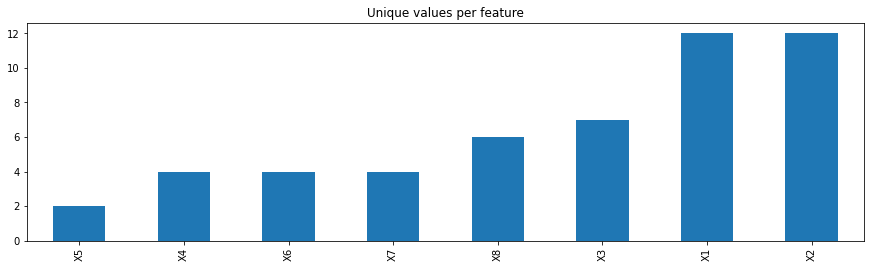

In [10]:
# For each numerical feature compute number of unique entries
unique_values = X.select_dtypes(
  include="number").nunique().sort_values()

# Plot information with y-axis
unique_values.plot.bar(logy=False, figsize=(15, 4),
                       title="Unique values per feature");

In [11]:
# Scaling and normalizing the data
X_normalized = preprocessing.normalize(X, norm='l2')

In [12]:
alpha_values = [0.001,0.01,0.1, 1.0, 10.0]
regr_cv = RidgeCV(alphas=alpha_values)
model_cv = regr_cv.fit(X_normalized, y)
optimum_alpha = model_cv.alpha_

In [13]:
optimum_alpha

0.001

In [14]:
alpha_values = [0.001,0.01,0.1, 1.0, 10.0]

ridge_model = Ridge(normalize = True)

scoring_metrics = ['neg_mean_squared_error', 'neg_mean_absolute_error']

print("---------------------------------------------------")
print(f"Alpha : {optimum_alpha}")
ridge_model.alpha = optimum_alpha
# prepare the cross-validation procedure
ridge_cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
# evaluate model
scores = cross_validate(ridge_model, X, y, scoring=scoring_metrics, cv=ridge_cv, n_jobs=-1)
ridge_MSE_means = (np.mean(scores['test_neg_mean_squared_error']))
ridge_MAE_means = (np.mean(scores['test_neg_mean_absolute_error']))
ridge_MSE_stds = (np.std(scores['test_neg_mean_squared_error']))
ridge_MAE_stds = (np.std(scores['test_neg_mean_absolute_error']))
# report performance
print('MSE (mean) : %.3f (std) : (%.3f)' % (ridge_MSE_means, ridge_MSE_stds))
print('MAE (mean) : %.3f (std) : (%.3f)' % (ridge_MAE_means, ridge_MAE_stds))
print("****************************************************")

---------------------------------------------------
Alpha : 0.001
MSE (mean) : -9.536 (std) : (1.888)
MAE (mean) : -2.179 (std) : (0.232)
****************************************************


In [18]:
# Scaling the data
scaler = preprocessing.StandardScaler()
X_std = scaler.fit_transform(X)

In [19]:
regr_cv = RidgeCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0])

In [20]:
model_cv = regr_cv.fit(X_std, y)

In [21]:
model_cv.alpha_

0.1

In [22]:
# After scaling the data
df_X_sc = pd.DataFrame(X_std, columns = features)
df_X_sc.head(15)

,X1,X2,X3,X4,X5,X6,X7,X8
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575
5,1.284979,-1.229239,0.000000,-1.198678,1.0,-0.447214,-1.760447,-1.814575
6,1.284979,-1.229239,0.000000,-1.198678,1.0,0.447214,-1.760447,-1.814575
7,1.284979,-1.229239,0.000000,-1.198678,1.0,1.341641,-1.760447,-1.814575
8,0.906580,-0.950920,-0.561951,-0.655880,1.0,-1.341641,-1.760447,-1.814575
9,0.906580,-0.950920,-0.561951,-0.655880,1.0,-0.447214,-1.760447,-1.814575


In [32]:
hier_index

[('MSE', 'RandomForest'), ('MAE', 'RidgeRegression')]

In [30]:
hier_index_2

MultiIndex([('MSE',    'RandomForest'),
            ('MSE', 'RidgeRegression')],
           )

In [44]:
from tabulate import tabulate
scores = ['MSE', 'MAE', 'MSE', 'MAE']
models = ['RandomForest', 'RidgeRegression', 'RandomForest', 'RidgeRegression']
hier_index = list(zip(scores, models))
hier_index_2 = pd.MultiIndex.from_tuples(hier_index)
df = pd.DataFrame(randn(2,4), ['Y1', 'Y2'], hier_index_2 )
print(df.to_markdown())

|    |   ('MSE', 'RandomForest') |   ('MAE', 'RidgeRegression') |   ('MSE', 'RandomForest') |   ('MAE', 'RidgeRegression') |
|:---|--------------------------:|-----------------------------:|--------------------------:|-----------------------------:|
| Y1 |                 -0.721261 |                     0.75762  |                  0.809851 |                     -1.824   |
| Y2 |                  0.181333 |                     0.405592 |                  1.51814  |                     -2.07528 |


In [5]:
a = 1
b = 2
c = 3
d = 4
e = np.array([a,b,c,d]).reshape(2,2)
e

array([[1, 2],
       [3, 4]])

In [7]:
df = pd.DataFrame(e, ['Y1', 'Y2'] ,hier_index_2)
df

MSE                
   RandomForest RidgeRegression
Y1            1               2
Y2            3               4

In [10]:
print("±")

±


In [9]:
print( r"value $\pm$ error" )

value $\pm$ error


In [13]:
np.zeros(4)

array([0., 0., 0., 0.])

In [14]:
3 % 2

1

In [15]:
4 % 2

0

In [19]:
f = np.zeros(4 ,str)
f[0] = 8.711  ± 1.741

SyntaxError: invalid character in identifier (<ipython-input-19-e0c563089793>, line 2)

In [31]:
import sympy as sym
pm = sym.Symbol('±')
s1 = 8.711
s2 = 1.741


r = np.array(['a'], dtype='object')

aa = str(s1) + " ± " + str(s2)
r[0] = aa
print(r[0])

8.711 ± 1.741


In [32]:
df = pd.read_excel('data/ENB2012_data.xlsx')

features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
targets = ['Y1', 'Y2']

X = df[features]
y = df[targets]

In [33]:
X.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
